# RFM Analizi Nedir
* RFM analizi, müşterileri segmentlere ayırmak için geçmiş satın alma davranışlarını baz alan bir müşteri segmentasyon tekniğidir.

## Recency

* Müşterinin ne kadardır websitesinden/mağazadan hizmet aldığı, ne zamandır bize üye olduğu gibi bilgileri verir. Hesaplanması genellikle, bugünden son üyelik tarihi/son sipariş tarihinin çıkartılmasıyla elde edilir.

## Frequency

* Müşterinin ne sıklıkla alışveriş yaptığını, ne sıklıkla siteye giriş yaptığını gösteren metriktir. Genellikle sipariş numarası/sipariş kodunun saydırılmasıyla sonuç verir.

## Monetary

* Müşterinin harcamalarının toplamıdır. E-ticaret sitesine getirdiği ciro, aldığı hizmetler sonrası toplanan getiri olarak da tanımlanabilir. Ciro tanımı ne ise, müşteri bazında hayatı boyunca yapılan harcamalar toplanarak hesaplanır.

In [1]:
#Kütüphaneleri yüklüyoruz
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt
import seaborn as sns

In [2]:
# Veriyi içe aktarıyoruz
df = pd.read_excel("online_retail_II.xlsx")

**Invoice**: Fatura numarası. Her işleme yani faturaya ait eşsiz numara. C ile başlıyorsa iptal edilen işlem.

**StockCode**: Ürün kodu. Her bir ürün için eşsiz numara.

**Description** : Ürün ismi

**Quantity** : Ürün adedi. Faturalardaki ürünlerden kaçar tane satıldığını ifade etmektedir.

**InvoiceDate** : Fatura tarihi ve zamanı.

**Price** : Ürün fiyatı (Sterlin cinsinden)

**CustomerID** : Eşsiz müşteri numarası

**Country** : Ülke ismi. Müşterinin yaşadığı ülke.


In [3]:
df.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 525461 entries, 0 to 525460
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   Invoice      525461 non-null  object        
 1   StockCode    525461 non-null  object        
 2   Description  522533 non-null  object        
 3   Quantity     525461 non-null  int64         
 4   InvoiceDate  525461 non-null  datetime64[ns]
 5   Price        525461 non-null  float64       
 6   Customer ID  417534 non-null  float64       
 7   Country      525461 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 32.1+ MB


In [5]:
len(df)

525461

In [6]:
df['Customer ID'].nunique()

4383

In [7]:
print(df["Description"].nunique())
df["Description"].value_counts()

4681


WHITE HANGING HEART T-LIGHT HOLDER     3549
REGENCY CAKESTAND 3 TIER               2212
STRAWBERRY CERAMIC TRINKET BOX         1843
PACK OF 72 RETRO SPOT CAKE CASES       1466
ASSORTED COLOUR BIRD ORNAMENT          1457
                                       ... 
stock credited from royal yacht inc       1
VINTAGE METAL CAKE STAND CREAM            1
BLUE BAROQUE FLOCK CANDLE HOLDER          1
S/4 HEART CRYSTAL FRIDGE MAGNETS          1
dotcom email                              1
Name: Description, Length: 4681, dtype: int64

In [8]:
df.nunique()

Invoice        28816
StockCode       4632
Description     4681
Quantity         825
InvoiceDate    25296
Price           1606
Customer ID     4383
Country           40
dtype: int64

In [9]:
df[df.Price <= 0].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3690 entries, 263 to 525235
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Invoice      3690 non-null   object        
 1   StockCode    3690 non-null   object        
 2   Description  762 non-null    object        
 3   Quantity     3690 non-null   int64         
 4   InvoiceDate  3690 non-null   datetime64[ns]
 5   Price        3690 non-null   float64       
 6   Customer ID  31 non-null     float64       
 7   Country      3690 non-null   object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 259.5+ KB


In [10]:
# Toplam harcamayı sütun olarak ekliyoruz
df["Total_price"] = df["Price"] * df["Quantity"]

In [11]:
df.InvoiceDate.max()

Timestamp('2010-12-09 20:01:00')

In [12]:
df.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,Total_price
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom,83.4
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,81.0
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,81.0
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom,100.8
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom,30.0


In [13]:
# Sipariş tarihinin tipini datetime olarak değiştiriyoruz
df["InvoiceDate"] = pd.to_datetime(df["InvoiceDate"])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 525461 entries, 0 to 525460
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   Invoice      525461 non-null  object        
 1   StockCode    525461 non-null  object        
 2   Description  522533 non-null  object        
 3   Quantity     525461 non-null  int64         
 4   InvoiceDate  525461 non-null  datetime64[ns]
 5   Price        525461 non-null  float64       
 6   Customer ID  417534 non-null  float64       
 7   Country      525461 non-null  object        
 8   Total_price  525461 non-null  float64       
dtypes: datetime64[ns](1), float64(3), int64(1), object(4)
memory usage: 36.1+ MB


In [14]:
#Bugün bilgisini today değişkenine kaydediyoruz
today = dt.datetime(2010,12,31,0,0)
print(today)

2010-12-31 00:00:00


In [15]:
# 0'dan büyük verileri alıyoruz.
data = df[(df["Quantity"] > 0) & (df["Total_price"] > 0)]

In [16]:
data[data.Total_price < 0].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 0 entries
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Invoice      0 non-null      object        
 1   StockCode    0 non-null      object        
 2   Description  0 non-null      object        
 3   Quantity     0 non-null      int64         
 4   InvoiceDate  0 non-null      datetime64[ns]
 5   Price        0 non-null      float64       
 6   Customer ID  0 non-null      float64       
 7   Country      0 non-null      object        
 8   Total_price  0 non-null      float64       
dtypes: datetime64[ns](1), float64(3), int64(1), object(4)
memory usage: 0.0+ bytes


In [17]:
# Receny ve Monetary değerlerini hesaplıyoruz

In [18]:
data_x = data.groupby('Customer ID').agg({
    'InvoiceDate': lambda x: (today - x.max()).days,
    'Total_price': 'sum'
})

In [19]:
data_x

,InvoiceDate,Total_price
Customer ID,,
12346.0,185,372.86
12347.0,23,1323.32
12348.0,94,222.16
12349.0,63,2671.14
12351.0,31,300.93
...,...,...
18283.0,38,641.77
18284.0,87,461.68
18285.0,316,427.00


In [20]:
data_y = data.groupby(["Customer ID", "Invoice"]).agg({
    'Total_price': lambda x: x.sum()
})
data_y

Total_price
Customer ID Invoice             
12346.0     491725         45.00
            491742         22.50
            491744         22.50
            492718         22.50
            492722          1.00
...                          ...
18286.0     519785        833.48
18287.0     508581       1071.61
            523289        862.00
            523290         30.60
            534346        381.50

[19213 rows x 1 columns]

In [21]:
data_z = data_y.groupby("Customer ID").agg({
    'Total_price': lambda x: len(x)
})
data_z

,Total_price
Customer ID,
12346.0,11
12347.0,2
12348.0,1
12349.0,3
12351.0,1
...,...
18283.0,6
18284.0,1
18285.0,1


In [22]:
rfm_data = pd.merge(data_x, data_z,on="Customer ID")
rfm_data.columns = ["Recency", "Monetary", "Frequency"]
rfm_data

,Recency,Monetary,Frequency
Customer ID,,,
12346.0,185,372.86,11
12347.0,23,1323.32,2
12348.0,94,222.16,1
12349.0,63,2671.14,3
12351.0,31,300.93,1
...,...,...,...
18283.0,38,641.77,6
18284.0,87,461.68,1
18285.0,316,427.00,1


In [23]:
rfm_data.describe().T

,count,mean,std,min,25%,50%,75%,max
Recency,4312.0,111.172542,96.861457,21.00,38.0000,73.00,156.0000,394.00
Monetary,4312.0,2048.238236,8914.481280,2.95,307.9875,706.02,1723.1425,349164.35
Frequency,4312.0,4.455705,8.170213,1.00,1.0000,2.00,5.0000,205.00


In [24]:
# Frequency hesaplama
def RScore(x, p, d):
    if x <= d[p][0.20]:
        return 0
    elif x <= d[p][0.40]:
        return 1
    elif x <= d[p][0.60]: 
        return 2
    elif x <= d[p][0.80]:
        return 3
    else:
        return 4

In [25]:
quantiles_df = rfm_data.quantile(q=[0.20,0.40,0.60,0.80])
quantiles_df

,Recency,Monetary,Frequency
0.2,35.0,252.608,1.0
0.4,56.0,506.646,2.0
0.6,91.0,992.162,3.0
0.8,196.0,2146.116,6.0


In [26]:
quantiles_dict = quantiles_df.to_dict()
quantiles_dict

{'Recency': {0.2: 35.0, 0.4: 56.0, 0.6: 91.0, 0.8: 196.0},
 'Monetary': {0.2: 252.608,
  0.4: 506.646,
  0.6: 992.1619999999999,
  0.8: 2146.1160000000004},
 'Frequency': {0.2: 1.0, 0.4: 2.0, 0.6: 3.0, 0.8: 6.0}}

In [27]:
rfm_data["Freq_Tile"] = rfm_data['Frequency'].apply(RScore, args=('Frequency', quantiles_df))

In [28]:
rfm_data["Freq_Tile"].head()

Customer ID
12346.0    4
12347.0    1
12348.0    0
12349.0    2
12351.0    0
Name: Freq_Tile, dtype: int64

In [29]:
#Recency hesaplama
rfm_data = rfm_data.sort_values('Recency', ascending=True)
rfm_data["Rec_Tile"] = pd.qcut(rfm_data["Recency"],5, labels=False)

In [30]:
#Monetary Hesaplama
rfm_data["Mone_Tile"] = pd.qcut(rfm_data["Monetary"], 5, labels=False)

In [31]:
rfm_data.head()

,Recency,Monetary,Frequency,Freq_Tile,Rec_Tile,Mone_Tile
Customer ID,,,,,,
14932.0,21,666.13,2,1,0,2
14667.0,21,12685.94,31,4,0,4
17097.0,21,386.03,2,1,0,1
15288.0,21,1576.61,6,3,0,3
17950.0,21,950.61,6,3,0,2


In [32]:
#'Sıfır' değerinin yer almaması için bulduğumuz değerleri 1 arttırıyoruz
rfm_data['Rec_Tile'] = rfm_data['Rec_Tile'] + 1
rfm_data['Freq_Tile'] = rfm_data['Freq_Tile'] + 1
rfm_data['Mone_Tile'] = rfm_data['Mone_Tile'] + 1
rfm_data.head(2)

,Recency,Monetary,Frequency,Freq_Tile,Rec_Tile,Mone_Tile
Customer ID,,,,,,
14932.0,21,666.13,2,2,1,3
14667.0,21,12685.94,31,5,1,5


In [33]:
# rfm_data['RFM Score'] = rfm_data['Rec_Tile'].apply(str) + (rfm_data['Freq_Tile']).apply(str) + (rfm_data['Mone_Tile']).apply(str)
rfm_data['RFM Score'] = (rfm_data['Rec_Tile'] * 0.33) + (rfm_data['Freq_Tile']* 0.33) + (rfm_data['Mone_Tile'] * 0.34)

In [34]:
#müşterileri rfm score'una göre segmentlere ayırıyoruz
def segment_customer(rfm_score):
    if rfm_score <= 1:
        return 'hibernating'
    if rfm_score <= 2:
        return 'at_Risk'
    if rfm_score <= 3:
        return 'need_attention'
    if rfm_score <= 4:
        return 'loyal_customers'
    if rfm_score <= 5:
        return 'champions'

In [35]:
rfm_data["segment"] = rfm_data['RFM Score'].map(segment_customer)
rfm_data

,Recency,Monetary,Frequency,Freq_Tile,Rec_Tile,Mone_Tile,RFM Score,segment
Customer ID,,,,,,,,
14932.0,21,666.13,2,2,1,3,2.01,need_attention
14667.0,21,12685.94,31,5,1,5,3.68,loyal_customers
17097.0,21,386.03,2,2,1,2,1.67,at_Risk
15288.0,21,1576.61,6,4,1,4,3.01,loyal_customers
17950.0,21,950.61,6,4,1,3,2.67,need_attention
...,...,...,...,...,...,...,...,...
17056.0,394,128.60,1,1,5,1,2.32,need_attention
12636.0,394,141.00,1,1,5,1,2.32,need_attention
12362.0,394,130.00,1,1,5,1,2.32,need_attention


In [36]:
rfm_data.info()

<class 'pandas.core.frame.DataFrame'>
Float64Index: 4312 entries, 14932.0 to 16763.0
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Recency    4312 non-null   int64  
 1   Monetary   4312 non-null   float64
 2   Frequency  4312 non-null   int64  
 3   Freq_Tile  4312 non-null   int64  
 4   Rec_Tile   4312 non-null   int64  
 5   Mone_Tile  4312 non-null   int64  
 6   RFM Score  4312 non-null   float64
 7   segment    4312 non-null   object 
dtypes: float64(2), int64(5), object(1)
memory usage: 303.2+ KB


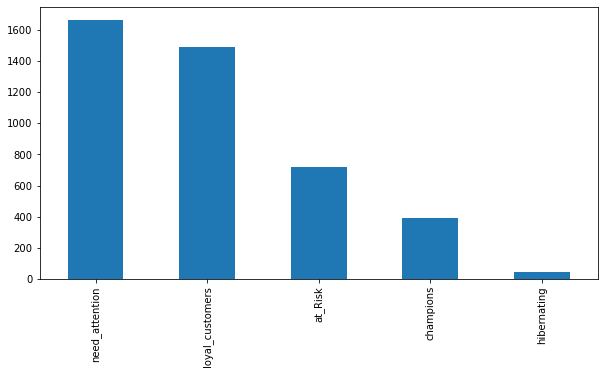

In [37]:
plt.figure(figsize=(10,5))
rfm_data.segment.value_counts().plot.bar();

In [38]:
segmented_groups = rfm_data.groupby(['segment']).agg({
    'Recency': ['mean','min','max','count'],
    'Frequency': ['mean','min','max','count'],
    'Monetary': ['mean','min','max','count']
}).round(1)
segmented_groups.head()

Recency                Frequency                Monetary  \
                   mean min  max count      mean min  max count     mean   
segment                                                                    
at_Risk            71.5  21  196   721       1.3   1    4   721    250.6   
champions          93.4  36  347   393       9.1   2   46   393   4884.2   
hibernating        29.3  22   35    44       1.0   1    1    44    143.8   
loyal_customers    80.3  21  394  1490       7.8   1  205  1490   3949.2   
need_attention    162.4  21  394  1664       1.9   1    9  1664    505.5   

                                         
                    min       max count  
segment                                  
at_Risk             3.8     949.8   721  
champions        1010.7   50291.4   393  
hibernating        11.0     247.4    44  
loyal_customers   181.4  349164.4  1490  
need_attention      3.0    2945.4  1664

## Bu şekilde, segmentasyon işlemi aslında sonlanmış oluyor. Örneğin 'hibernating' segmentini yorumlayacak olursak, 
* bu segmentte 44 kişi bulunmakta,
* ortalama olarak en son alışverişleri 29 gün önce gerçekleşmiş,
* alışveriş sıklıkları ortalama 1,
* ve ortamama 143.8 dolar/TL harcamaları olmuş.

### Bu sonuçlardan yola çıkarak farklı gruplar üzerinde farklı stratejiler uygulanabilir.